# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** William Surya Putra
- **Email:** williams.p176@gmail.com
- **ID Dicoding:** williamlz

## Menentukan Pertanyaan Bisnis

- Which season sees the most bike rentals?
- How do variables like temp, atemp, and humidity impact the total number of bike users, including both Casual and Registered?
- How do weather conditions influence the total number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Gathering Day csv

day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Gathering Hour csv

hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insights:**
- Load dataset into day_df hour_df which contain information about the bike rentals, including seasons, temperature, and weather that we want to analyze
- Some of the column names in both datasets can be improved to be more descriptive so as to facilitate reading

### Assessing Data

In [5]:
# Check all data types in each column in day_df and hour_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Checking for missing values and duplication in day_df and hour_df

day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Amount of Duplicated Data: ", day_df.duplicated().sum())

Amount of Duplicated Data:  0


In [9]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Amount of Duplicated Data: ", hour_df.duplicated().sum())

Amount of Duplicated Data:  0


**Insight:**
- Based on day_df and hour_df, all the data types above are appropriate and nothing needs to be changed.
- Based on day_df and hour_df, no duplicate data found

### Cleaning Data

Since the column names above are not suitable and unclear, we will change them or convert it into categorical form. If there were any incorrect data types previously, we will also change those.

In [11]:
# Change name of column
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Change number of several columns into descriptive labels
day_df ['season'] = day_df['season'].map({
  1: 'Spring',
  2: 'Summer',
  3: 'Fall',
  4: 'Winter'
})

day_df['month'] = day_df['month'].map({
  1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weather_cond'] = day_df['weather_cond'].map({
  1: 'Clear/Partly Cloudy',
  2: 'Misty/Cloudy',
  3: 'Light Snow/Rain',
  4: 'Severe Weather'
})

In [13]:
# Format dteday column in day_df into datetime type
# Change seasons' datatype in both dataframe into category

day_df['dateday'] = pd.to_datetime(day_df['dateday'])
day_df.dtypes

day_df['season'] = day_df['season'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')

**Insight:**
- Format the season, weathersit, dteday column and season's datatype to make it easier to read
- More readable data helps in analysis and interpretation, especially when creating visualizations or reports

## Exploratory Data Analysis (EDA)

- Group bike renters by season

In [14]:
day_df.groupby(by='season').agg({
  'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_10972\2872865733.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Based on the result above, the largest number and largest average bike rentals is in Fall season and the smallest number and smallest average is in the Spring season

- Group bike renters (both casual and registered) by month

In [15]:
day_df.groupby(by='month').agg({
  'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Based on the result above, the largest number and largest average bike rentals is in June and the smallest number and smallest average is in January

- Group bike renters by weather condition

In [16]:
day_df.groupby(by='weather_cond').agg({
  'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Based on the result above, bike renters prefer to rent during sunny or cloudy weather. Very few in snow / rain and none when the weather is very bad

- Group temp, atemp, and hum by season

In [17]:
day_df.groupby(by='season').agg({
  'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_10972\1825420696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

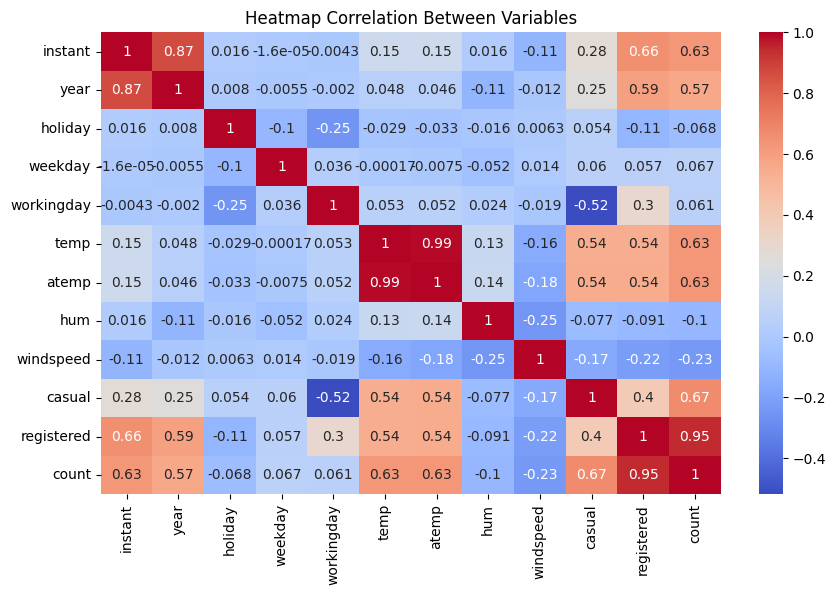

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation Between Variables')
plt.show()

**Insight**:
- This code extracts the numeric columns from the datasets and then calculates the correlation matrix, allowing us to see the relationship between the various numeric features in both datasets.
- Using sns.heatmap, we can clearly see how strong the relationship between variables is. The colors in the heatmap indicate the strength and direction of the correlation: Red color indicates a positive correlation (direct relationship) between the variables, Blue color indicates a negative correlation (inverse relationship) between the variables.
- The heatmap shows a strong positive correlation between temperature and the number of rentals, and a negative correlation between humidity and the number of rentals, indicating that weather and seasonality affect the demand for bike rentals.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which season sees the most bike rentals?

C:\Users\Asus\AppData\Local\Temp\ipykernel_10972\1228830765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_season = day_df.groupby('season')['count'].sum().reset_index()


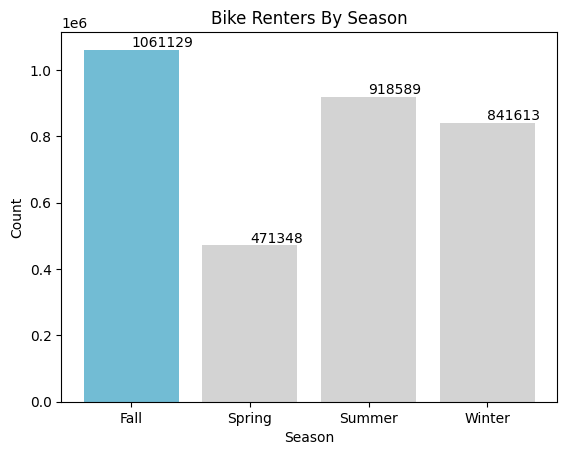

In [19]:
most_season = day_df.groupby('season')['count'].sum().reset_index()
colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3']

bars = plt.bar(most_season['season'], most_season['count'], color=colors)
plt.title('Bike Renters By Season')
plt.ylabel('Count')
plt.xlabel('Season')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
plt.show()

**Insight:**
- The code above categorizes the data based on the season column and counts the number of bike rentals in each season, which gives an idea of how many bikes are rented in each season.
- From the graph above it can be concluded that Fall is the season with the most bike rentals compared to other seasons, this could indicate that good weather tends to encourage more people to use bike.

### Pertanyaan 2: How do variables like temp, atemp, and humidity impact the total number of bike users, including both Casual and Registered?

- Temp vs Count

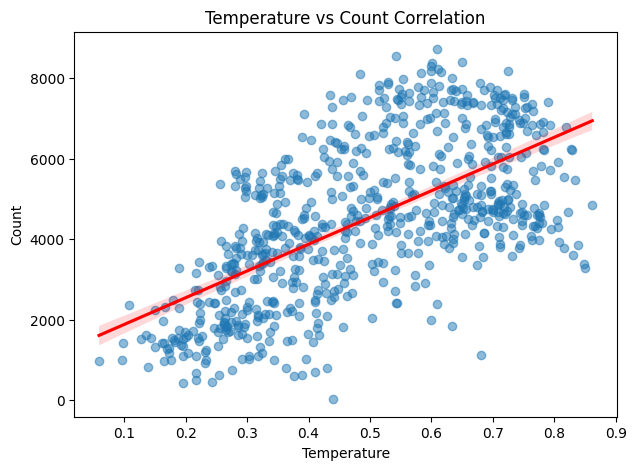

In [20]:
plt.figure(figsize=(7, 5))
sns.regplot(x='temp', 
            y='count', 
            data=day_df, 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'red'})

plt.title('Temperature vs Count Correlation')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.show()

**Insight**:
- The relationship between temperature and the number of bike rentals shows a positive correlation between the two variables
- the red line on the graph shows the linear relationship between temperature and the number of bike rentals. If the regression line is upward sloping, it indicates that there is an increasing trend in the number of bike rentals against temperature. Better temperatures encourage people to use bike

- Atemp vs Count

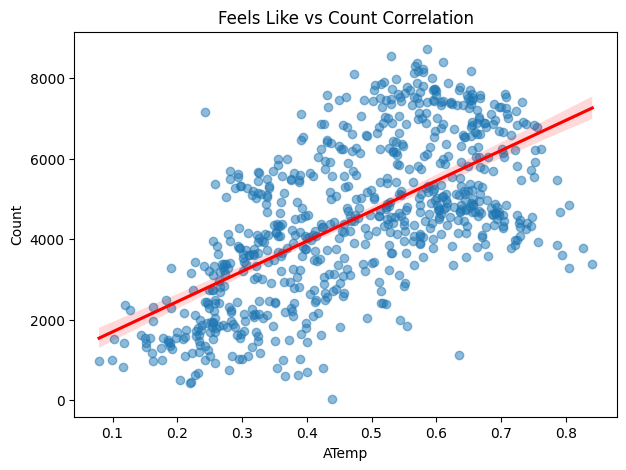

In [21]:
plt.figure(figsize=(7, 5))
sns.regplot(x='atemp', 
            y='count', 
            data=day_df, 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'red'})

plt.title('Feels Like vs Count Correlation')
plt.xlabel('ATemp')
plt.ylabel('Count')

plt.show()

**Insight:**
- The relationship between atemp and count also shows a positive correlation between the two variables


- Humidity vs Count

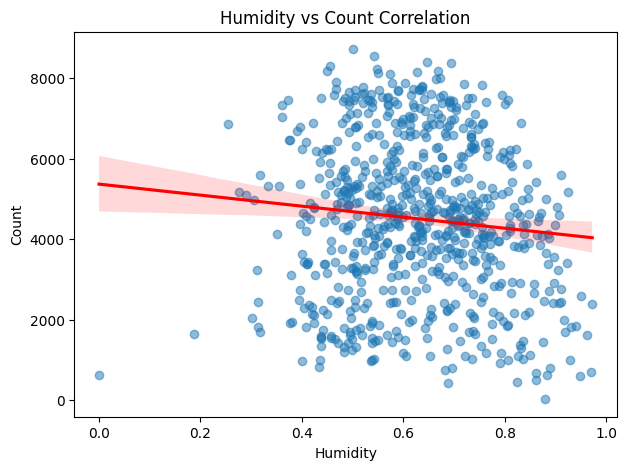

In [22]:
plt.figure(figsize=(7, 5))
sns.regplot(x='hum', 
            y='count', 
            data=day_df, 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'red'})

plt.title('Humidity vs Count Correlation')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.show()

**Insight:**
- The relationship between humidity and the number of bike rentals was found to show a slightly negative correlation. This is indicated by the downward sloping red line, which shows a downward trend in the number of bike rentals. High humidity discourages people from using bike

### Pertanyaan 3: How do weather conditions influence the total number of bike rentals?

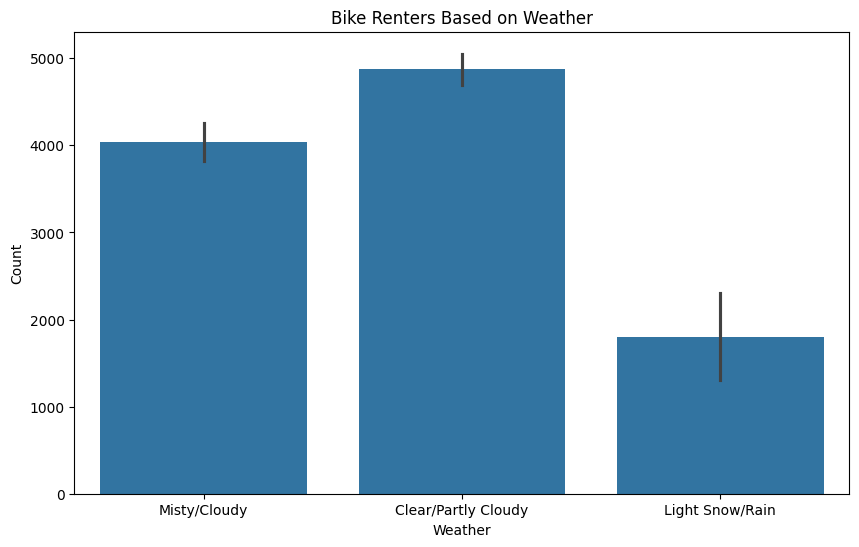

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Bike Renters Based on Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

**Insight:**
- From the graph above, it can be concluded that there is a clear relationship between weather conditions and bike rentals. Clear/party-cloudy weather conditions are the most used conditions for people to use bike, followed by misty/cloudy weather, and finally when the weather is light snow/rainy are the least used conditions.

## Conclusion

### Question 1 = Which season sees the most bike rentals?
The season has a big influence on the number of bike rentals. In summer or spring, when the weather is more favorable for cycling, the number of bike rentals tends to increase. Companies can increase the stock of bikes and conduct promotions during high-demand seasons such as summer. Conversely, during the winter or rainy season, special promotions or service adjustments may be necessary to attract customers.

### Question 2 = How do variables like temp, atemp, and humidity impact the total number of bike users, including both Casual and Registered?
From the three visualizations shown, it can be concluded that temperature (temp and atemp) has a positive correlation with the number of bike rentals. This means that when the temperature increases, the number of bike users also tends to increase. In contrast, humidity shows a negative correlation with the number of rentals, although the effect is very small. However, it is still the case that the number of bike users will slightly decrease when humidity increases.

### Question 3 = How do weather conditions influence the total number of bike rentals?
Inclement weather such as rain or fog tends to reduce the number of bike rentals, while sunny and stable weather favors an increase in rentals. Therefore, companies need to devise strategies to deal with bad weather, such as offering special promotions or providing weather gear (e.g. raincoats or bike covers) to remain attractive to customers even when the weather is not ideal.

## Export data to dashboard

In [24]:
day_df.to_csv('dashboard/all_data.csv', index=False)